# Question 1

You are provided with a dataset of shape (1000, 10), where each of the 1000 rows represents a pair of an end-effector position and its corresponding joint angles. Each row consists of:

(1) The first 3 dimensions: robot end-effector position (x, y, z)
(2) The last 7 dimensions: corresponding robot joint angles (7-DegOfFrdm robot arm)

Answer the question below:

Given a new end-effector position (-0.18067622, -0.18449534, 1.61964518), use KNN to predict its corresponding joint angles (i.e., solving the inverse kinematics problem)

Notes:
 - Given an end-effector position, we need to work out the corresponding 7 joint angles that will bring the end-effector closest to the new position - there could be multiple solutions to this!
 - We can look to our dataset of 1000 X/Y/Z end effector positions and corresponding joint angles - we could just reference this to get the angles - if there is no match we can use supervised learning
 - KNN prediction:
    - Given a query input (end-effector position)
    - Find the k nearest neighbours by comparing the query point with all points in the dataset
    - Calculate the average (or weighted average) of the target/output values of the k-nearest-neighbours
 - In this context, we need to define a k, go over all end-effector positions and find the k closest positions to it, before averaging out the angles to get our new joint angles
 - The fact that we choose k makes this 'supervised' learning

In [75]:
import numpy as np
import matplotlib.pyplot as plt

The dataset include 1000 samples/trajectories


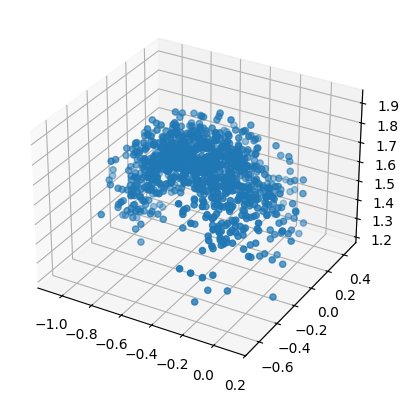

In [92]:
data = np.load("data.npy")
eef_position = data[..., 0:3]   # x, y, z coordinates
joint_angles = data[..., 3:]    # joint angles for a seven degree of freedom robot
print("The dataset include {} samples/trajectories".format(len(data)))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(eef_position[:, 0], eef_position[:, 1], eef_position[:, 2])
plt.show()

In [77]:
new_eef_pos = np.array([-0.18067622, -0.18449534, 1.61964518]) # desired end-effector position
actual_joint_angles = np.array([-0.28158251, 0.64710445, 0.64139232, -0.0452992, -0.29836178, -0.27488041, 0.61142905]) # actual joint angles

# For each position in eef_position, find the distance to new_eef_pos
distances = np.linalg.norm(eef_position - new_eef_pos, axis=1)

In [ ]:
# Find the joint angles for a specific k value
def find_joint_angles(k, given_actual_joint_angles):
    # Find indexes of k smallest distances
    k_indexes = np.argsort(distances)[:k]
    
    # Average out the joint angles across the k positions
    top = 0
    bottom = 0
    for index in k_indexes:
        weight = 1/distances[index]
        top += weight * joint_angles[index]
        bottom += weight
    calculated_joint_angles = top/bottom
    
    # Calculate and normalise the error - angles range from -1 to +1 so have a maximum error of 2
    # Dividing our error by the maximum error allows us to see our error on a scale of 0-1 (more readable)
    max_possible_error = 2
    error = np.mean(np.abs(np.array(calculated_joint_angles) - np.array(given_actual_joint_angles))) # error between calculated_joint_angles & joint_angles
    normalised_error = error / max_possible_error
    
    return calculated_joint_angles, normalised_error

# Iterate over a given number of k values and find the k value giving the most accurate joint angles
def find_best_k(k_limit, given_actual_joint_angles):
    best_error = np.inf # arbitrarily high initial best error
    best_k = 1 # arbitrarily low initial best k
    for i in range(1, k_limit):
        calculated_joint_angles, error = find_joint_angles(i, given_actual_joint_angles) # work out angles and error
        if (error < best_error):
            best_error = error
            best_k = i
    return best_k, calculated_joint_angles, best_error

# Iterate over a given number of k values and find the corresponding errors
# Note: good for plotting k values against errors
def find_errors(k_limit, given_actual_joint_angles):
    k_values = np.empty(k_limit-1)
    all_calculated_joint_angles = np.empty((k_limit-1, len(given_actual_joint_angles)))
    errors = np.empty(k_limit-1)
    for i in range(1, k_limit):
        calculated_joint_angles, error = find_joint_angles(i, given_actual_joint_angles)
        k_values[i-1] = i
        all_calculated_joint_angles[i-1] = calculated_joint_angles
        errors[i-1] = error
    return k_values, all_calculated_joint_angles, errors
        


In [99]:

# Get the joint angles and error for a given k
k = 100
final, error = find_joint_angles(k, actual_joint_angles)
print("K value:", k, "\nJoint angles:", final, "\nError:", error)

K value: 100 
Joint angles: [-0.24455254  0.56189719  0.0343725  -0.15959067 -0.1129687  -0.11986337
  0.14936964] 
Error: 0.1175727177269401


In [100]:

# Get the best k, error and joint angles within a specified range of k values
k_limit = 1000
best_k, calculated_joint_angles, best_error = find_best_k(k_limit, actual_joint_angles)
print("Best k:", best_k, "\nJoint angles:", calculated_joint_angles, "\nBest error:", best_error)

Best k: 3 
Joint angles: [-0.05677528  0.24371703 -0.01466925 -0.05463224 -0.05727557 -0.04302445
  0.05909911] 
Best error: 0.06220381534325157


In [101]:

# Get the errors within a specified range of k values
k_limit = 1000
k_values, all_calculated_joint_angles, errors = find_errors(k_limit, actual_joint_angles)

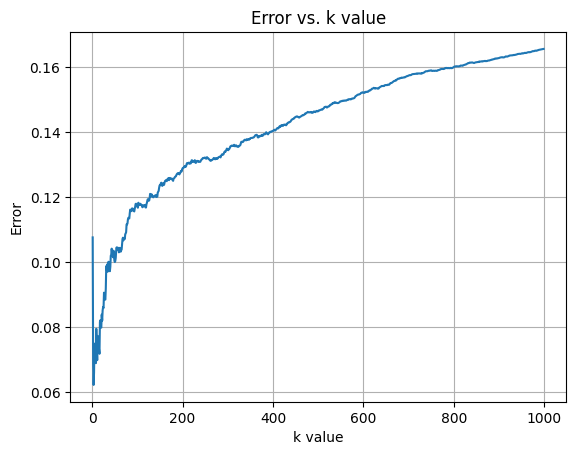

In [102]:
import matplotlib.pyplot as plt

# Plot errors against the k values
plt.plot(k_values, errors)
plt.xlabel('k value')
plt.ylabel('Error')
plt.title('Error vs. k value')
plt.grid(True)
plt.show()

# Discuss the results in your report

For the given end-effector position (-0.18067622, -0.18449534, 1.61964518), the actual joint angles are (-0.28158251, 0.64710445, 0.64139232, -0.0452992, -0.29836178, -0.27488041, 0.61142905).

Experiment with different values of K and evaluate their performance. Then, analyze and discuss your findings in the report. You do not need to write code for this section—focus on interpreting and explaining the results in your discussion.

In [83]:
# TODO: discuss your results in your report, no code required here.

# 